
# <u><b>Predictive modeling of customer bookings<b></u>

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler




In [68]:
df = pd.read_csv("/content/customer_booking (1).csv", encoding="ISO-8859-1")

### Dataset has 50,000 rows and 14 columns

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [70]:
#check for unique values in the column
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [71]:
#convert categorical values to numericals i.e Monday=1 etc
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [72]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [73]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [74]:
# Display the column names in the DataFrame
print(df.columns)


Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')


In [75]:

def clean_data(df):
    # Step 1: Handling missing values
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)

    # Step 2: Dropping duplicate rows
    duplicate_rows = df.duplicated().sum()
    print("\nDuplicate Rows:")
    print(duplicate_rows)

    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)

    # Step 3: Handling outliers (if necessary)
    # You can use statistical methods like z-score or IQR to detect and handle outliers

    # Example of dropping rows with outliers based on a specific column
    # outlier_threshold = 3
    # df = df[(df['column_name'] < outlier_threshold)]

    return df



# Step 2: One-Hot Encoding
encoded_df = pd.get_dummies(df, columns=["sales_channel", "trip_type"], drop_first=True)

# Step 3: Data Cleaning
cleaned_df = clean_data(encoded_df)

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(cleaned_df.head())


Missing Values:
num_passengers           0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
sales_channel_Mobile     0
trip_type_OneWay         0
trip_type_RoundTrip      0
dtype: int64

Duplicate Rows:
719

Cleaned DataFrame:
   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96              31            4           6   
4               2             68              22           15           3   

    route booking_origin  wants_extra_baggage  wants_preferred

In [76]:

# Check the unique values in the 'route' column
unique_routes = df['route'].unique()

# Display the unique routes
print("Unique Routes:")
print(unique_routes)

# Check the length of each unique route
route_lengths = [len(route.split('->')) for route in unique_routes]

# Display the lengths of unique routes
print("\nLengths of Unique Routes:")
print(route_lengths)


Unique Routes:
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'CGKOOL'
 'CGKPEK' 'CGKPER' 'CGKPUS' 'CGKPVG'

In [77]:
# Create a DataFrame to store unique routes and their lengths
unique_routes_df = pd.DataFrame({
    'Route': unique_routes,
    'Length': route_lengths
})

# Sort the DataFrame by route length
sorted_routes_df = unique_routes_df.sort_values(by='Length')

# Display the sorted DataFrame
print("\nSorted Unique Routes by Length:")
print(sorted_routes_df)



Sorted Unique Routes by Length:
      Route  Length
760  CTULOP       1
761  DELKBR       1
762  DELURT       1
763  HDYKIX       1
764  HGHSIN       1
..      ...     ...
795  KIXMRU       1
796  KTMTWU       1
797  MLEPVG       1
798  MRUXIY       1
0    AKLDEL       1

[799 rows x 2 columns]


Top 10 Commonly Used Routes:
route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
ICNSYD     695
DMKPER     679
DPSICN     666
DMKOOL     655
MELPEN     649
Name: count, dtype: int64


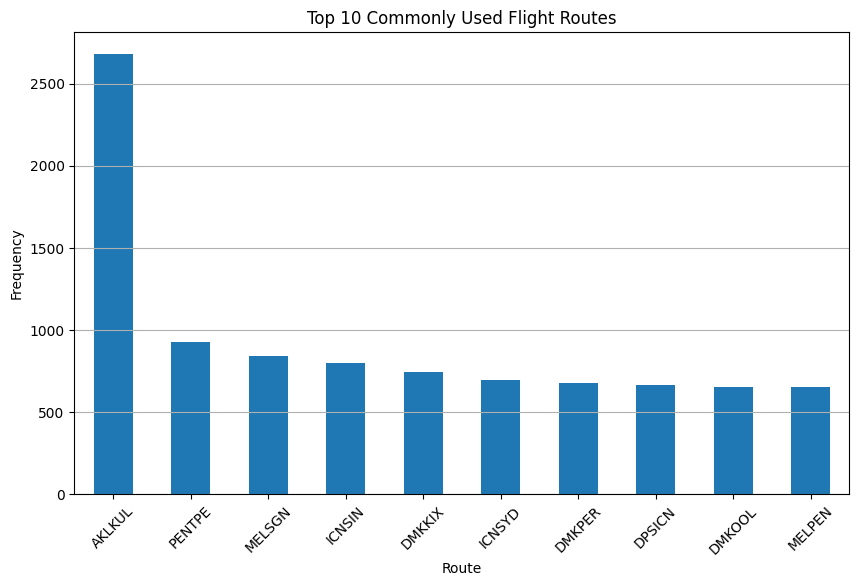

In [78]:
import matplotlib.pyplot as plt


# Check the frequency of each route
route_counts = df['route'].value_counts()

# Print the top 10 commonly used routes
top_routes = route_counts.head(10)
print("Top 10 Commonly Used Routes:")
print(top_routes)

# Plot the top 10 commonly used routes
plt.figure(figsize=(10, 6))
top_routes.plot(kind='bar')
plt.title("Top 10 Commonly Used Flight Routes")
plt.xlabel("Route")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


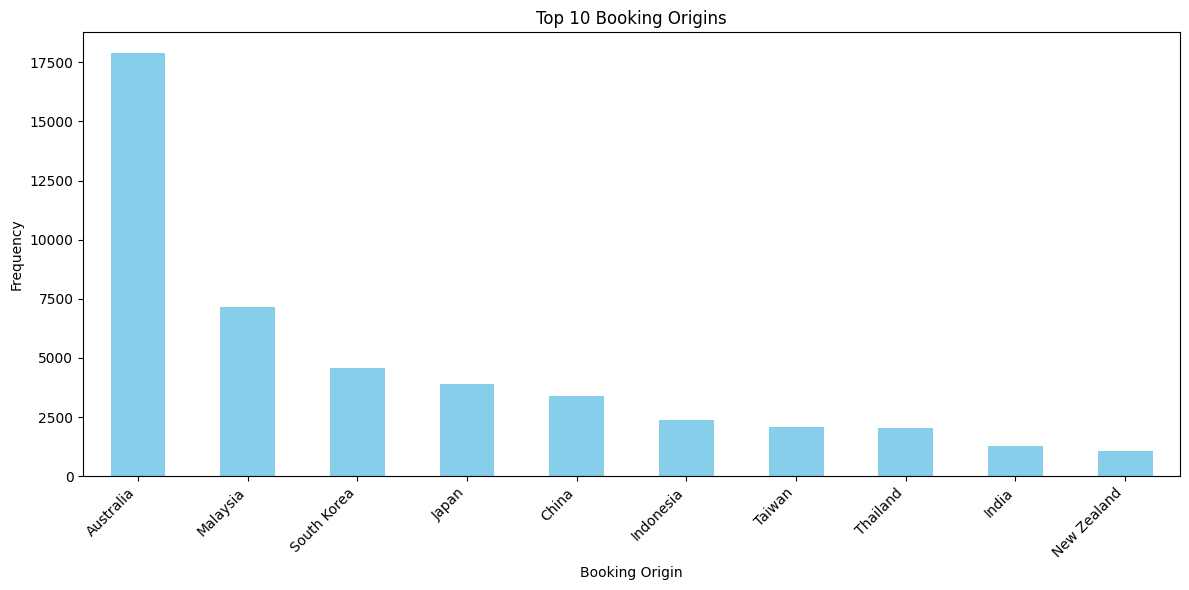

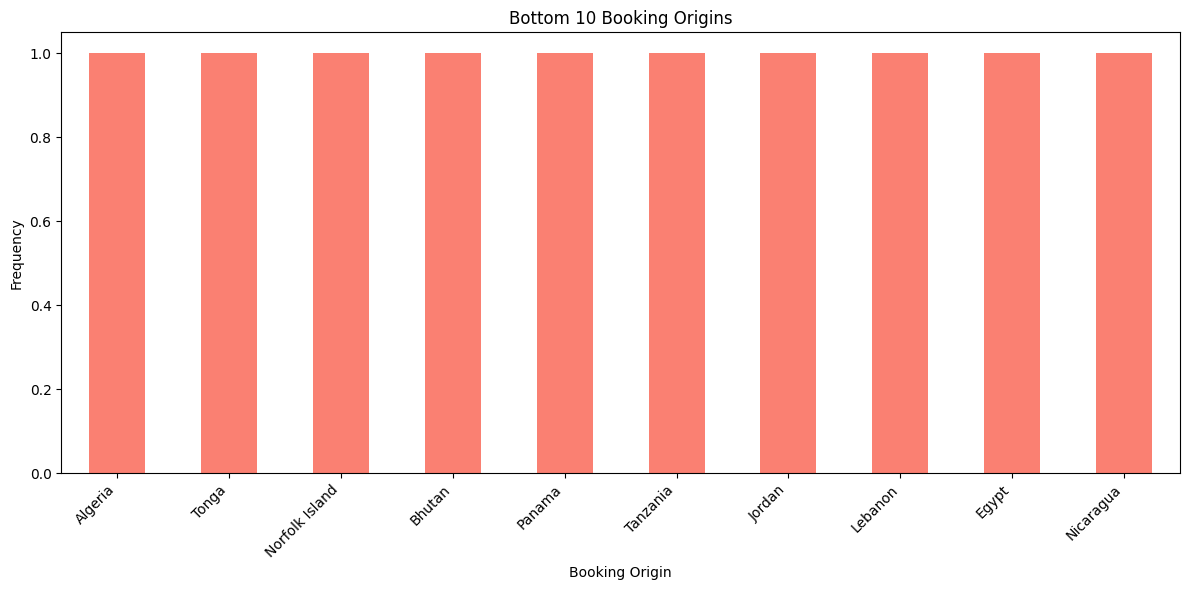

In [79]:


# Get the frequency of each booking origin
booking_origin_counts = df['booking_origin'].value_counts()

# Sort the booking origins by frequency
sorted_booking_origins = booking_origin_counts.sort_values(ascending=False)

# Extract top 10 and bottom 10 booking origins
top_10_booking_origins = sorted_booking_origins.head(10)
bottom_10_booking_origins = sorted_booking_origins.tail(10)

# Plot the bar plot for top 10 booking origins
plt.figure(figsize=(12, 6))
top_10_booking_origins.plot(kind='bar', color='skyblue')
plt.title('Top 10 Booking Origins')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot the bar plot for bottom 10 booking origins
plt.figure(figsize=(12, 6))
bottom_10_booking_origins.plot(kind='bar', color='salmon')
plt.title('Bottom 10 Booking Origins')
plt.xlabel('Booking Origin')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## From the graphical presentations most individuals book their flights while at Australia

In [80]:
# Count the occurrences of each sales channel
sales_channel_counts = df['sales_channel'].value_counts()

# Print the frequency of each sales channel
print("Sales Channel Frequencies:")
print(sales_channel_counts)


Sales Channel Frequencies:
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


#### `Most BA customers prefer booking flights via the internet as opposed to the offices :44,382 flights booked via internet while 5618 flights on mobile `

In [81]:

# Count the occurrences of each trip type
trip_type_counts = df['trip_type'].value_counts()
trip_type_counts



trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

`Commonly booked flights are RoundTrips`

In [82]:
# Count the occurrences of each extra baggage status
extra_baggage_counts = df['wants_extra_baggage'].value_counts()
extra_baggage_counts


wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

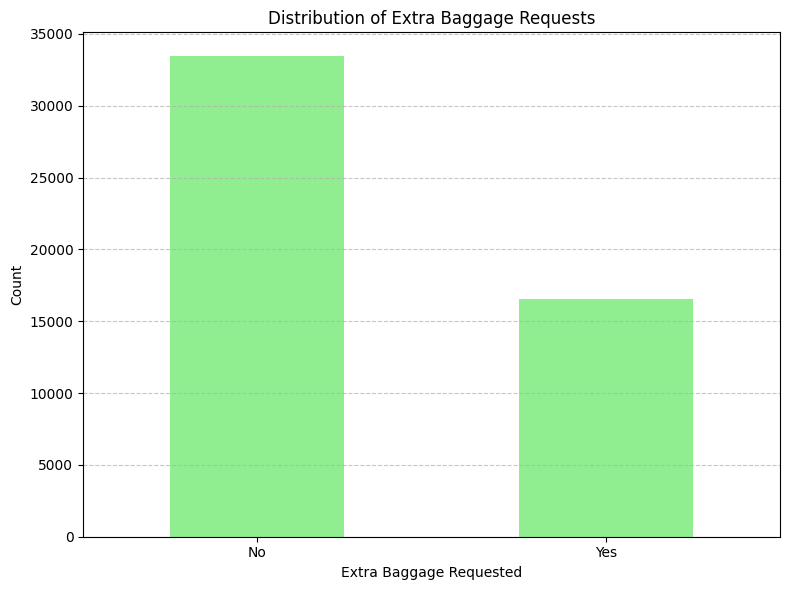

In [83]:
# Plot a bar chart to represent how often people requested to travel with extra luggage at booking
plt.figure(figsize=(8, 6))
extra_baggage_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Extra Baggage Requests')
plt.xlabel('Extra Baggage Requested')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [84]:
flight_meals_counts = df['wants_in_flight_meals'].value_counts()
flight_meals_counts


wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [85]:
flight_booking_complete= df['booking_complete'].value_counts()
flight_booking_complete

booking_complete
0    42522
1     7478
Name: count, dtype: int64

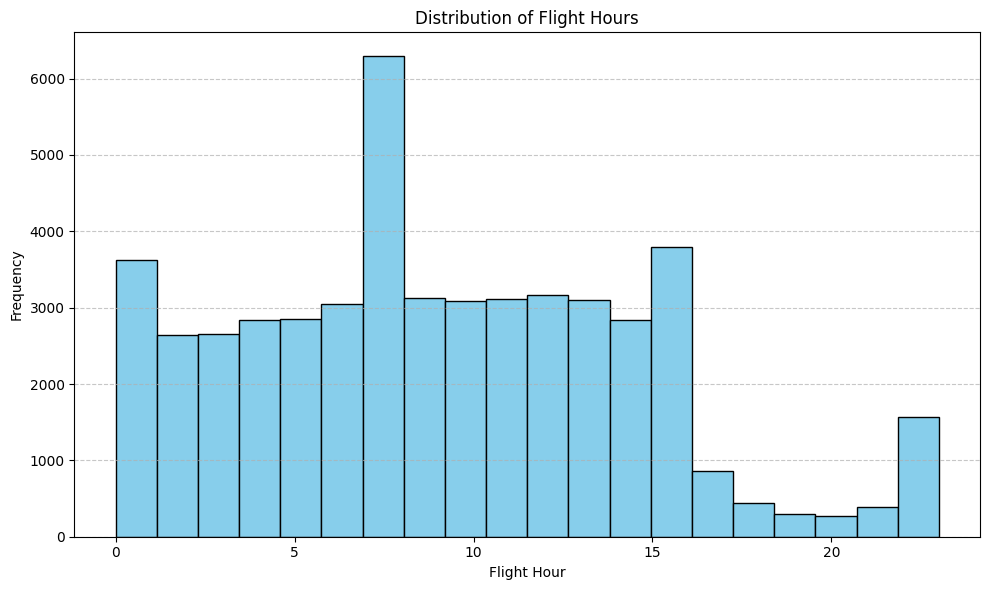

In [86]:
import matplotlib.pyplot as plt

# Plot a histogram of flight hours
plt.figure(figsize=(10, 6))
plt.hist(df['flight_hour'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Flight Hours')
plt.xlabel('Flight Hour')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### `most common hour of flight departure is at 0800hrs with the least at 2000hrs`

In [87]:
flight_hour_distribution = df['flight_hour'].value_counts()
print("Flight Hour Distributions:")
print(flight_hour_distribution)


Flight Hour Distributions:
flight_hour
8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: count, dtype: int64


In [88]:
flight_duration_distribution = df['flight_duration'].value_counts()
print("Flight Duration Distributions:")
print(flight_duration_distribution)


Flight Duration Distributions:
flight_duration
8.83    14520
8.58     6965
5.62     5524
6.62     4721
7.00     3374
7.57     2835
4.67     2743
6.42     1737
5.33     1554
4.75     1255
6.33     1190
8.67      807
5.52      667
5.07      512
4.72      502
8.15      311
5.00      241
7.42      224
4.83      156
5.13      125
9.50       37
Name: count, dtype: int64


### `Individual travel for long distances using the BA with 8.83 or 8hr 50min flight duration as the highest while 9hr 30min flight the least`

In [89]:
length_of_stay_distribution = df['length_of_stay'].value_counts()
print("Length of Stay Distributions:")
print(length_of_stay_distribution)


Length of Stay Distributions:
length_of_stay
6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
303       1
247       1
195       1
356       1
262       1
Name: count, Length: 335, dtype: int64


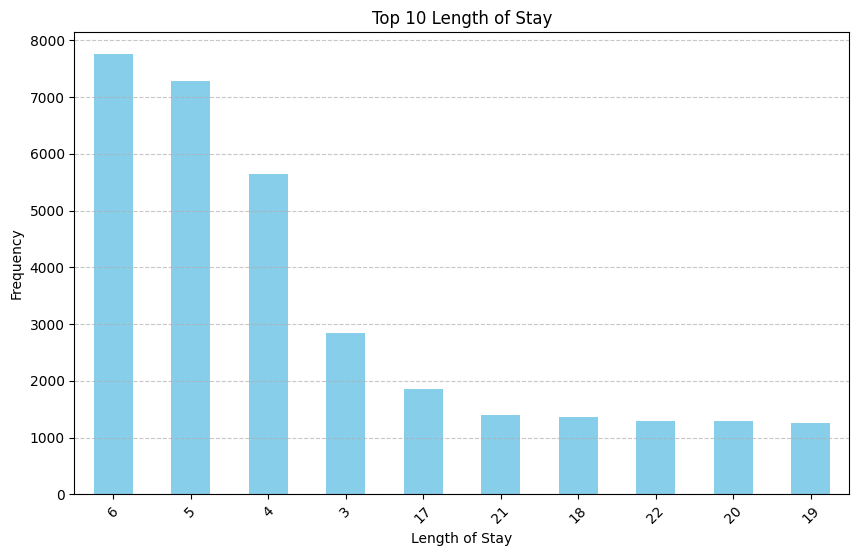

In [90]:

# Get the top 10 length of stay values
top_10_length_of_stay = df['length_of_stay'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_10_length_of_stay.plot(kind='bar', color='skyblue')
plt.title('Top 10 Length of Stay')
plt.xlabel('Length of Stay')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


`Customers prefer travelling and staying in their respective destinations for approximately 6 days`

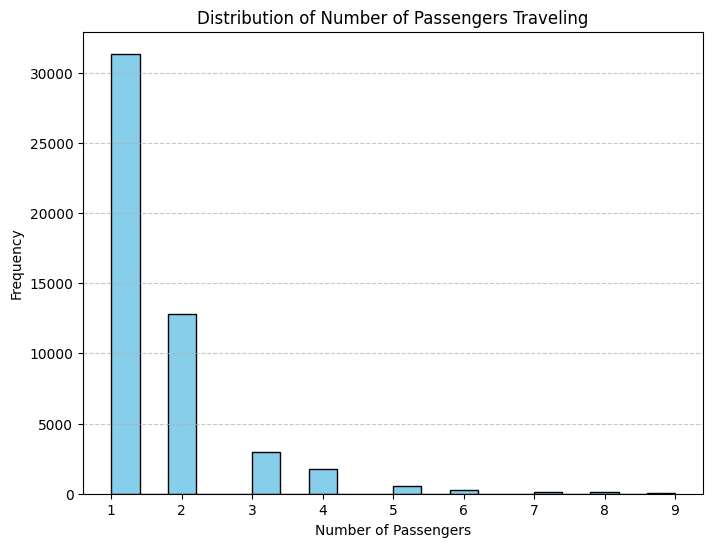

In [91]:

# Plotting the histogram
plt.figure(figsize=(8, 6))
plt.hist(df['num_passengers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Passengers Traveling')
plt.xlabel('Number of Passengers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


`Solo travelling`

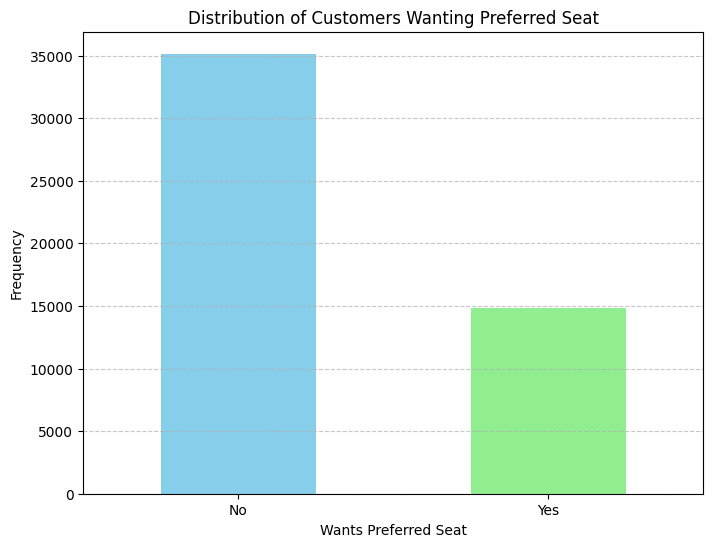

In [92]:

# Count the frequency of customers who want a preferred seat
preferred_seat_counts = df['wants_preferred_seat'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
preferred_seat_counts.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Customers Wanting Preferred Seat')
plt.xlabel('Wants Preferred Seat')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [93]:
seat_counts = df['wants_preferred_seat'].value_counts()
print(seat_counts)


wants_preferred_seat
0    35152
1    14848
Name: count, dtype: int64


In [94]:
#FLIGHT ROUTES
unique_routes = df['route'].unique()
print("Unique Routes:")
print(unique_routes)


Unique Routes:
['AKLDEL' 'AKLHGH' 'AKLHND' 'AKLICN' 'AKLKIX' 'AKLKTM' 'AKLKUL' 'AKLMRU'
 'AKLPEK' 'AKLPVG' 'AKLTPE' 'AORICN' 'AORKIX' 'AORKTM' 'AORMEL' 'BBIMEL'
 'BBIOOL' 'BBIPER' 'BBISYD' 'BDOCTS' 'BDOCTU' 'BDOHGH' 'BDOICN' 'BDOIKA'
 'BDOKIX' 'BDOMEL' 'BDOOOL' 'BDOPEK' 'BDOPER' 'BDOPUS' 'BDOPVG' 'BDOSYD'
 'BDOTPE' 'BDOXIY' 'BKICKG' 'BKICTS' 'BKICTU' 'BKIHND' 'BKIICN' 'BKIKIX'
 'BKIKTM' 'BKIMEL' 'BKIMRU' 'BKIOOL' 'BKIPEK' 'BKIPER' 'BKIPUS' 'BKIPVG'
 'BKISYD' 'BKIXIY' 'BLRICN' 'BLRMEL' 'BLRPER' 'BLRSYD' 'BOMMEL' 'BOMOOL'
 'BOMPER' 'BOMSYD' 'BTJJED' 'BTUICN' 'BTUPER' 'BTUSYD' 'BTUWUH' 'BWNCKG'
 'BWNDEL' 'BWNHGH' 'BWNIKA' 'BWNKTM' 'BWNMEL' 'BWNOOL' 'BWNPER' 'BWNSYD'
 'BWNTPE' 'CANDEL' 'CANIKA' 'CANMEL' 'CANMRU' 'CANOOL' 'CANPER' 'CANSYD'
 'CCUMEL' 'CCUMRU' 'CCUOOL' 'CCUPER' 'CCUSYD' 'CCUTPE' 'CEBMEL' 'CEBOOL'
 'CEBPER' 'CEBSYD' 'CGKCKG' 'CGKCTS' 'CGKCTU' 'CGKDEL' 'CGKHGH' 'CGKHND'
 'CGKICN' 'CGKIKA' 'CGKJED' 'CGKKIX' 'CGKKTM' 'CGKMEL' 'CGKMRU' 'CGKOOL'
 'CGKPEK' 'CGKPER' 'CGKPUS' 'CGKPVG'

In [95]:
# Extract origin and destination airports from route
routes = df['route'].str.split('->', expand=True)
print(routes)


            0
0      AKLDEL
1      AKLDEL
2      AKLDEL
3      AKLDEL
4      AKLDEL
...       ...
49995  PERPNH
49996  PERPNH
49997  PERPNH
49998  PERPNH
49999  PERPNH

[50000 rows x 1 columns]


In [96]:
from collections import Counter

# Initialize Counter objects for origins and destinations
origin_counter = Counter()
destination_counter = Counter()

# Iterate over unique routes
for route in unique_routes:
    # Split the route into origin and destination
    origin, destination = route[:3], route[3:]

    # Increment the counts for origin and destination
    origin_counter[origin] += 1
    destination_counter[destination] += 1

# Convert Counters to dictionaries for easy manipulation
origin_dict = dict(origin_counter)
destination_dict = dict(destination_counter)

# Sort the dictionaries by frequency in descending order
sorted_origin = dict(sorted(origin_dict.items(), key=lambda item: item[1], reverse=True))
sorted_destination = dict(sorted(destination_dict.items(), key=lambda item: item[1], reverse=True))

# Display the top 10 origins and destinations
print("Top 10 Origins:")
for origin, count in list(sorted_origin.items())[:10]:
    print(f"{origin}: {count}")

print("\nTop 10 Destinations:")
for destination, count in list(sorted_destination.items())[:10]:
    print(f"{destination}: {count}")


Top 10 Origins:
DEL: 31
CTU: 30
ICN: 29
MEL: 29
KIX: 25
CKG: 24
HGH: 24
HND: 24
CGK: 22
OOL: 22

Top 10 Destinations:
SYD: 66
PER: 53
OOL: 50
MEL: 49
TPE: 42
XIY: 29
PVG: 26
WUH: 25
MRU: 24
PEK: 24


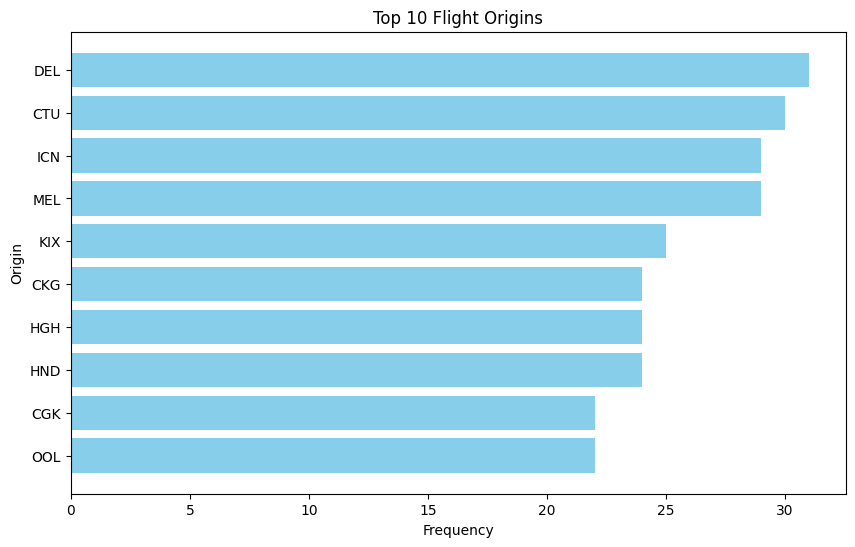

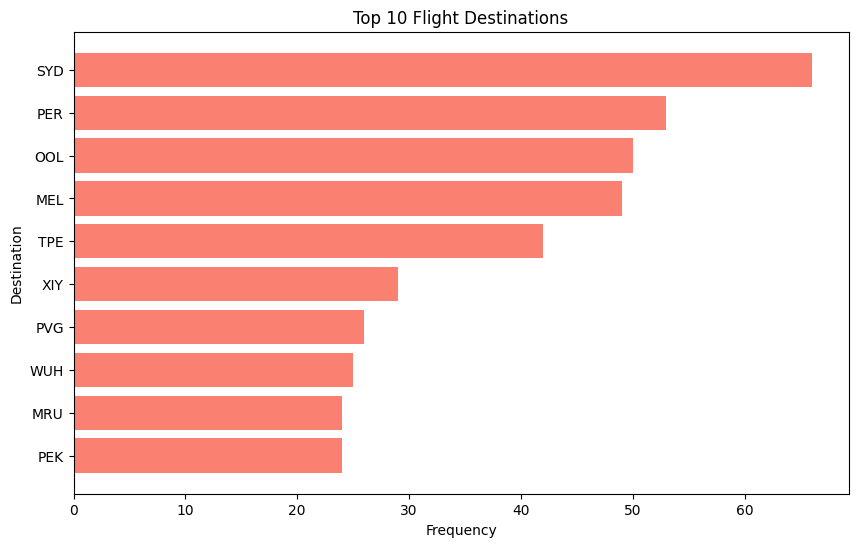

In [97]:
import matplotlib.pyplot as plt

# Extract top 10 origins and destinations
top_origins = list(sorted_origin.keys())[:10]
top_origin_counts = list(sorted_origin.values())[:10]

top_destinations = list(sorted_destination.keys())[:10]
top_destination_counts = list(sorted_destination.values())[:10]

# Plot bar graph for top 10 origins
plt.figure(figsize=(10, 6))
plt.barh(top_origins, top_origin_counts, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Origin')
plt.title('Top 10 Flight Origins')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

# Plot bar graph for top 10 destinations
plt.figure(figsize=(10, 6))
plt.barh(top_destinations, top_destination_counts, color='salmon')
plt.xlabel('Frequency')
plt.ylabel('Destination')
plt.title('Top 10 Flight Destinations')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()



In [98]:
##Feature engineering


# Extract flight origin and destination
df['flight_origin'] = df['route'].str[:3]
df['flight_destination'] = df['route'].str[3:]

# Display the modified DataFrame
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,flight_origin,flight_destination
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,AKL,DEL
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,AKL,DEL
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,AKL,DEL
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,AKL,DEL
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,AKL,DEL


In [99]:
import pandas as pd

# Feature Engineering
def feature_engineering(df):
    # Calculate the lead time (difference between purchase date and travel date)
    df['lead_time'] = (df['purchase_lead'] - df['length_of_stay'])

    # Binning flight duration into categories
    bins = [0, 3, 6, 9, 12, 15, 18, 21, 24]
    labels = ['<3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
    df['flight_duration_category'] = pd.cut(df['flight_duration'], bins=bins, labels=labels)

    # Encoding Categorical Variables
    encoded_df = pd.get_dummies(df, columns=["sales_channel", "trip_type"], drop_first=True)

    return encoded_df

# Data Cleaning
def data_cleaning(df):
    # Check for missing values
    missing_values = df.isnull().sum()
    print("Missing Values:")
    print(missing_values)

    # Check for duplicate rows
    duplicate_rows = df.duplicated().sum()
    print("\nDuplicate Rows:")
    print(duplicate_rows)

    # Drop duplicate rows if any
    if duplicate_rows > 0:
        df.drop_duplicates(inplace=True)

    return df


# Apply feature engineering
df = feature_engineering(df)

# Apply data cleaning
df = data_cleaning(df)

# Display the cleaned and engineered DataFrame
print("\nCleaned and Engineered DataFrame:")
print(df.head())


Missing Values:
num_passengers              0
purchase_lead               0
length_of_stay              0
flight_hour                 0
flight_day                  0
route                       0
booking_origin              0
wants_extra_baggage         0
wants_preferred_seat        0
wants_in_flight_meals       0
flight_duration             0
booking_complete            0
flight_origin               0
flight_destination          0
lead_time                   0
flight_duration_category    0
sales_channel_Mobile        0
trip_type_OneWay            0
trip_type_RoundTrip         0
dtype: int64

Duplicate Rows:
719

Cleaned and Engineered DataFrame:
   num_passengers  purchase_lead  length_of_stay  flight_hour  flight_day  \
0               2            262              19            7           6   
1               1            112              20            3           6   
2               2            243              22           17           3   
3               1             96     

In [100]:
# Drop duplicate rows
encoded_df.drop_duplicates(inplace=True)

# Check if duplicate rows are removed
duplicate_rows_after = encoded_df.duplicated().sum()
print("\nDuplicate Rows After Removal:")
print(duplicate_rows_after)



Duplicate Rows After Removal:
0


In [101]:
print(encoded_df[['sales_channel_Mobile', 'trip_type_OneWay']].head())


   sales_channel_Mobile  trip_type_OneWay
0                 False             False
1                 False             False
2                 False             False
3                 False             False
4                 False             False


In [102]:
print(encoded_df['sales_channel_Mobile'].unique())
print(encoded_df['trip_type_OneWay'].unique())


[False  True]
[False  True]


In [103]:
# One-hot encode categorical variables
X_train_encoded = pd.get_dummies(X_train)

# Train the model
rf_classifier.fit(X_train_encoded, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.8503601501471035

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8378
           1       0.51      0.06      0.11      1479

    accuracy                           0.85      9857
   macro avg       0.68      0.52      0.51      9857
weighted avg       0.80      0.85      0.80      9857



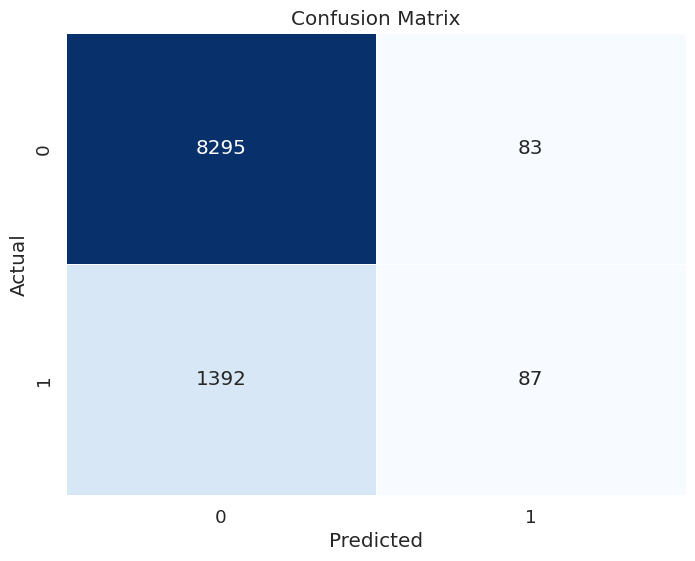

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Split the data into features and target variable
X = encoded_df.drop(columns=['booking_complete'])
y = encoded_df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# One-hot encode categorical variables in the training data
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train_encoded, y_train)

# One-hot encode categorical variables in the testing data
X_test_encoded = encoder.transform(X_test)

# Make predictions
y_pred = rf_classifier.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

